In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # default library for making plots
import seaborn as sns # for making prettier plots!

In [120]:
def stripAndReplaceColumns(row, key):
    row[key] = int(row[key].replace(',',''))

def buildSleepColumns(row):
    startTimeData = row['Start Time'].split(" ")
    row['Date'] = startTimeData[0]
    row['Sleep Start'] = startTimeData[1]
    row['Sleep End'] = row['End Time'].split(" ")[1]
    return row

def buildActivitiesColumns(row):
    stripAndReplaceColumns(row, 'Calories Burned')
    stripAndReplaceColumns(row, 'Steps')
    stripAndReplaceColumns(row, 'Minutes Sedentary')
    stripAndReplaceColumns(row, 'Minutes Lightly Active')
    stripAndReplaceColumns(row, 'Minutes Fairly Active')
    stripAndReplaceColumns(row, 'Minutes Very Active')
    stripAndReplaceColumns(row, 'Activity Calories')
    return row

In [121]:
filename = 'data/fitbit_all.xls'

sleepData = pd.read_excel(filename, sheet_name="Sleep")
activitiesData = pd.read_excel(filename, sheet_name="Activities", 
                               converters={
                                   'Calories Burned': str,
                                   'Steps':str,
                                   'Distance':float,
                                   'Floors':int,
                                   'Minutes Sedentary':str,
                                   'Minutes Lightly Active':str,
                                   'Minutes Fairly Active':str,
                                   'Minutes Very Active':str,
                                   'Activity Calories': str
                               })

sleepData = sleepData.apply(buildSleepColumns, axis=1)
sleepData = sleepData.drop(['Start Time', 'End Time'], axis=1)

activitiesData = activitiesData.apply(buildActivitiesColumns, axis=1)
activitiesData.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,24-06-2018,1996,3367,3.01,0,1377,47,2,14,362
1,25-06-2018,2863,8394,5.55,12,709,244,42,14,1361
2,26-06-2018,3398,13569,9.68,8,687,231,33,102,2004
3,27-06-2018,3442,13337,9.33,11,665,243,30,100,2035
4,28-06-2018,1701,559,0.36,6,1025,8,0,0,25


In [122]:
#merge both the DFs and free up them space!
data = pd.merge(activitiesData, sleepData, how="outer", on="Date")

#drop the duplicate Date rows
data.drop_duplicates(['Date'], keep='last', inplace=True)

#drop rows with less than 5 steps in a day
data.drop(data[data.Steps < 5].index, inplace=True)

#fill missing data with mean of the respective columns
data.fillna(data.mean(), inplace=True)

del activitiesData, sleepData
data

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Sleep Start,Sleep End
0,24-06-2018,1996,3367,3.01,0,1377,47,2,14,362,379.000000,52.000000,25.0,431.000000,79.00000,244.0000,56.00000,10:17PM,5:28AM
1,25-06-2018,2863,8394,5.55,12,709,244,42,14,1361,333.000000,54.000000,30.0,387.000000,44.00000,214.0000,75.00000,10:49PM,5:16AM
2,26-06-2018,3398,13569,9.68,8,687,231,33,102,2004,351.000000,51.000000,29.0,402.000000,75.00000,223.0000,53.00000,10:25PM,5:07AM
3,27-06-2018,3442,13337,9.33,11,665,243,30,100,2035,365.000000,42.000000,32.0,407.000000,102.00000,197.0000,66.00000,10:36PM,5:24AM
4,28-06-2018,1701,559,0.36,6,1025,8,0,0,25,347.085714,46.657143,26.0,393.742857,73.96875,207.1875,70.78125,NaN,NaN
7,01-07-2018,1718,155,0.09,0,1427,13,0,0,46,402.000000,38.000000,34.0,440.000000,92.00000,233.0000,77.00000,10:34PM,5:54AM
8,02-07-2018,2867,7554,4.81,9,701,245,22,32,1372,317.000000,81.000000,20.0,398.000000,92.00000,163.0000,62.00000,11:54PM,6:32AM
9,03-07-2018,2898,10173,7.40,2,667,210,21,67,1481,374.000000,21.000000,1.0,395.000000,73.96875,207.1875,70.78125,10:43PM,5:18AM
10,04-07-2018,3488,14012,9.56,20,711,289,43,79,2136,333.000000,60.000000,27.0,393.000000,52.00000,223.0000,58.00000,10:47PM,5:20AM
11,05-07-2018,3833,15603,11.62,8,634,249,36,128,2474,394.000000,48.000000,25.0,442.000000,66.00000,252.0000,76.00000,10:36PM,5:58AM


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 70
Data columns (total 19 columns):
Date                      59 non-null object
Calories Burned           59 non-null int64
Steps                     59 non-null int64
Distance                  59 non-null float64
Floors                    59 non-null int64
Minutes Sedentary         59 non-null int64
Minutes Lightly Active    59 non-null int64
Minutes Fairly Active     59 non-null int64
Minutes Very Active       59 non-null int64
Activity Calories         59 non-null int64
Minutes Asleep            59 non-null float64
Minutes Awake             59 non-null float64
Number of Awakenings      59 non-null float64
Time in Bed               59 non-null float64
Minutes REM Sleep         59 non-null float64
Minutes Light Sleep       59 non-null float64
Minutes Deep Sleep        59 non-null float64
Sleep Start               35 non-null object
Sleep End                 35 non-null object
dtypes: float64(8), int64(8), object(3)
me

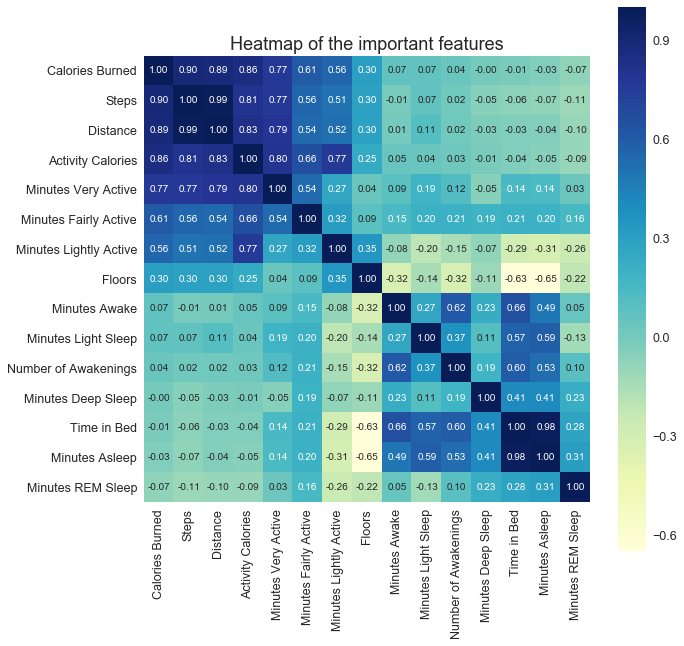

In [127]:
correlationOf="Calories Burned"
k = 15 #number of variables for heatmap
corrmat = data.corr()
cols = corrmat.nlargest(k, correlationOf)[correlationOf].index
cm = np.corrcoef(data[cols].values.T)

sns.set(style='darkgrid', palette='deep', font='sans-serif', font_scale=1.25) # Using Seaborn for making heatmap
plt.figure(figsize=(10, 10))

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, 
                 xticklabels=cols.values, cmap="YlGnBu")
hm.set_title("Heatmap of the important features", fontsize=18)
plt.show()

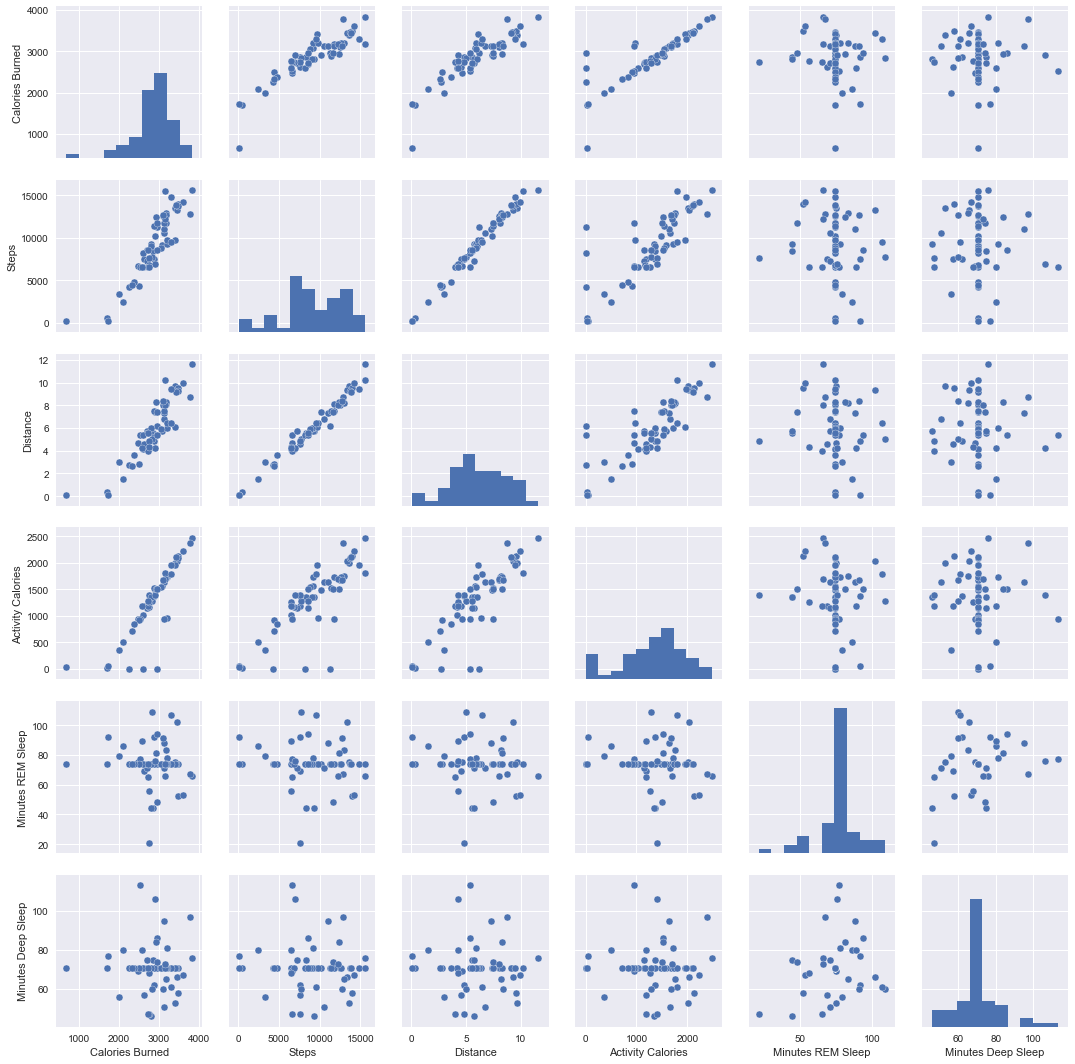

In [134]:
sns.set()
cols = ['Calories Burned', 'Steps', 'Distance', 'Activity Calories', 'Minutes REM Sleep', 'Minutes Deep Sleep']
sns.pairplot(data[cols], size = 2.5)
plt.show();

<Container object of 59 artists>

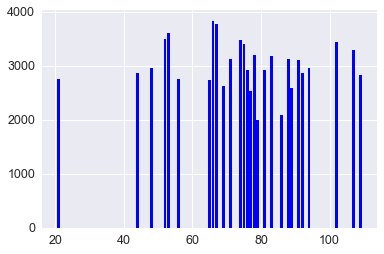

In [132]:
plt.bar(data['Minutes REM Sleep'], data['Calories Burned'], color="blue")

<Container object of 59 artists>

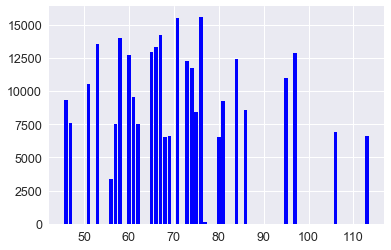

In [131]:
plt.bar(data['Minutes Deep Sleep'], data['Steps'], color="blue")